**SHETH L.U.J & SIR M.V COLLEGE**

DATA SCIENCE

T094 : Shubhangi Mane

AIM : Construct a decision tree model and interpret the decision rules for
classification.



Import Libraries



In [ ]:
# --- Importing Libraries ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import tree

print("Libraries imported!")


Libraries imported!


Load Dataset

In [ ]:
# --- Loading dataset ---

df = pd.read_csv('women_clothing_ecommerce_sales.csv')

print("Dataset Loaded Successfully!")
df.head()


Dataset Loaded Successfully!


,order_id,order_date,sku,color,size,unit_price,quantity,revenue
0,1,2022/6/1 16:05:00,708,Dark Blue,2XL,298,1,298
1,1,2022/6/1 16:05:00,89,Dark Blue,2XL,258,1,258
2,2,2022/6/10 17:03:00,bobo,Cream,One Size,228,1,228
3,3,2022/6/10 19:59:00,799,Dark Blue,XL,264,1,264
4,4,2022/6/11 11:42:00,799,Dark Blue,M,264,1,264


for cloums label

In [ ]:
df.columns


Index(['order_id', 'order_date', 'sku', 'color', 'size', 'unit_price',
       'quantity', 'revenue'],
      dtype='object')

set target

In [ ]:
features = ['sku', 'size', 'unit_price', 'quantity', 'revenue']
target = 'color'

df = df[features + [target]]
df.head()

,sku,size,unit_price,quantity,revenue,color
0,708,2XL,298,1,298,Dark Blue
1,89,2XL,258,1,258,Dark Blue
2,bobo,One Size,228,1,228,Cream
3,799,XL,264,1,264,Dark Blue
4,799,M,264,1,264,Dark Blue


Check Missing Values

In [ ]:
df.isnull().sum()


,0
sku,0
size,37
unit_price,0
quantity,0
revenue,0
color,0


Handle Missing Values

In [ ]:
# Fixing SettingWithCopyWarning
for col in ['unit_price', 'quantity', 'revenue']:
    df.loc[:, col] = df[col].fillna(df[col].mean())

df.loc[:, 'sku'] = df['sku'].fillna(df['sku'].mode()[0])
df.loc[:, 'size'] = df['size'].fillna(df['size'].mode()[0])
df.loc[:, 'color'] = df['color'].fillna(df['color'].mode()[0])

print("Missing values handled correctly!")


Missing values handled correctly!


In [ ]:
df.isnull().sum()


,0
sku,0
size,0
unit_price,0
quantity,0
revenue,0
color,0


Convert Categorical Features

In [ ]:
le_sku = LabelEncoder()
le_size = LabelEncoder()
le_color = LabelEncoder()

df['sku'] = le_sku.fit_transform(df['sku'])
df['size'] = le_size.fit_transform(df['size'])
df['color'] = le_color.fit_transform(df['color'])

df.head()


,sku,size,unit_price,quantity,revenue,color
0,15,0,298,1,298,14
1,20,0,258,1,258,14
2,23,6,228,1,228,12
3,18,8,264,1,264,14
4,18,4,264,1,264,14


Select Features + Target

Train–Test Split



In [ ]:
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101
)

print("Train-test split completed!")


Train-test split completed!


In [ ]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini')
clf.fit(X_train, y_train)

print("Model trained!")


Model trained!


In [ ]:
pred_test = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, pred_test))


Test Accuracy: 0.8364779874213837


In [ ]:
pred_train = clf.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, pred_train))


Train Accuracy: 0.9130434782608695


Report

In [ ]:
print("---- Test Report ----")
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

print("\n---- Train Report ----")
print(classification_report(y_train, pred_train))
print(confusion_matrix(y_train, pred_train))


---- Test Report ----
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.33      1.00      0.50         1
           5       1.00      0.50      0.67         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.50      1.00      0.67         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          14       0.97      0.96      0.97       122
          15       1.00      0.50      0.67         2
          19       0.00      0.00      0.00         1
          20       1.00      1.00      1.00         3
          21       0.54      0.78      0.64         9
          23       0.00      0.00      0.00         0
     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Plot Decision tree

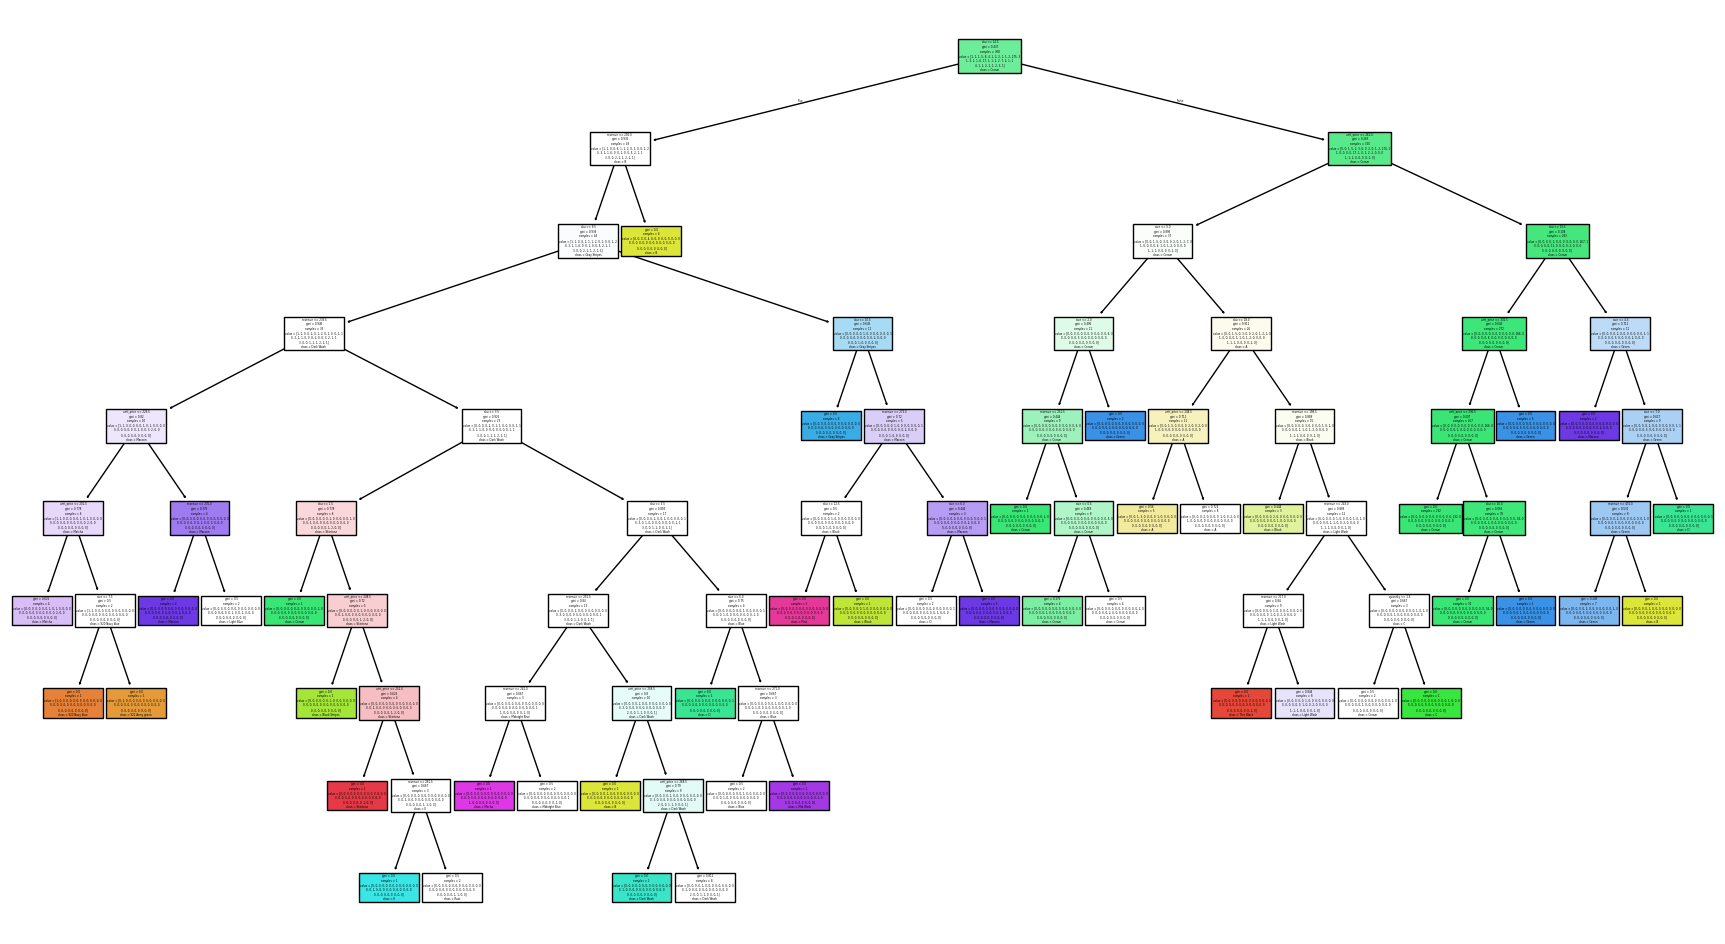

In [ ]:
plt.figure(figsize=(22,12))
tree.plot_tree(clf, filled=True, feature_names=features, class_names=le_color.classes_)
plt.show()


ROC is only valid for binary, but your color has many classes.
So we compute ROC only for one-vs-rest approach.

Plot ROC Curve (One example class)

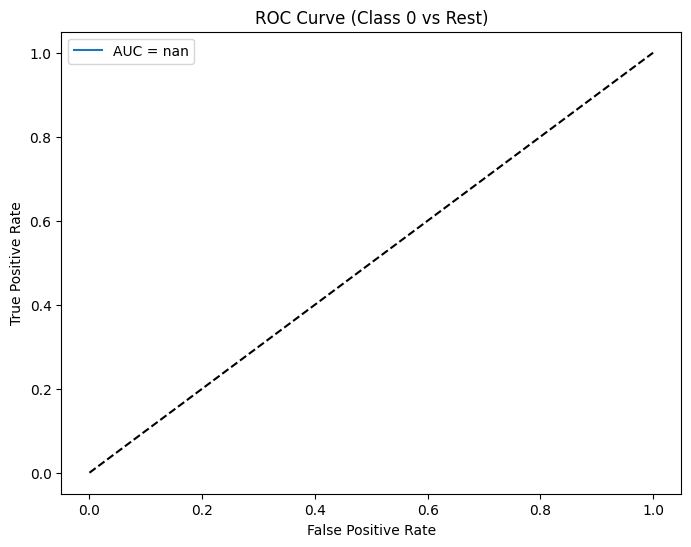

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(fpr[0], tpr[0], label="AUC = %.2f" % roc_auc[0])
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Class 0 vs Rest)")
plt.legend()
plt.show()


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)



DecisionTreeClassifier()

In [ ]:
y_pred_proba = dt.predict_proba(X_test)[:, 1]




Multiclass = cannot draw one PR curve

Instead: plot one curve per class (One-vs-Rest strategy)

test set does NOT contain some colors

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive c

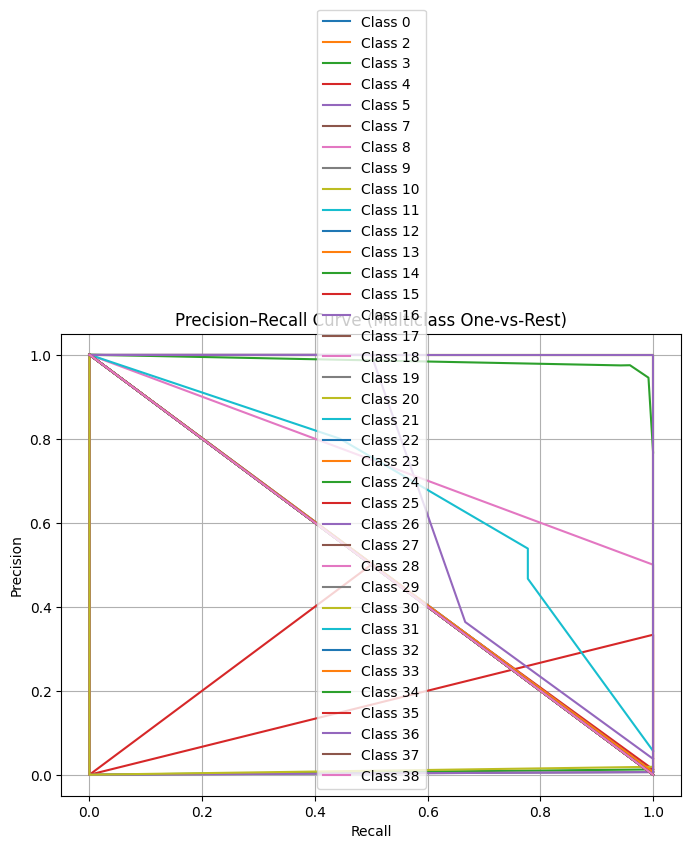

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Number of classes
classes = np.unique(y_train)

# 1. Binarize y_test
y_test_bin = label_binarize(y_test, classes=classes)

# 2. Predict probabilities for all classes
y_pred_proba = dt.predict_proba(X_test)

plt.figure(figsize=(8, 6))

# 3. Loop for each class
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {classes[i]}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Multiclass One-vs-Rest)")
plt.legend()
plt.grid()
plt.show()


Plot PR curves ONLY for classes that appear in y_test

Skipping class '0' (no samples in y_test)
Skipping class '2' (no samples in y_test)
Skipping class '7' (no samples in y_test)
Skipping class '11' (no samples in y_test)
Skipping class '13' (no samples in y_test)
Skipping class '16' (no samples in y_test)
Skipping class '17' (no samples in y_test)
Skipping class '18' (no samples in y_test)
Skipping class '22' (no samples in y_test)
Skipping class '23' (no samples in y_test)
Skipping class '24' (no samples in y_test)
Skipping class '25' (no samples in y_test)
Skipping class '27' (no samples in y_test)
Skipping class '28' (no samples in y_test)
Skipping class '29' (no samples in y_test)
Skipping class '31' (no samples in y_test)
Skipping class '32' (no samples in y_test)
Skipping class '34' (no samples in y_test)
Skipping class '35' (no samples in y_test)
Skipping class '37' (no samples in y_test)
Skipping class '38' (no samples in y_test)


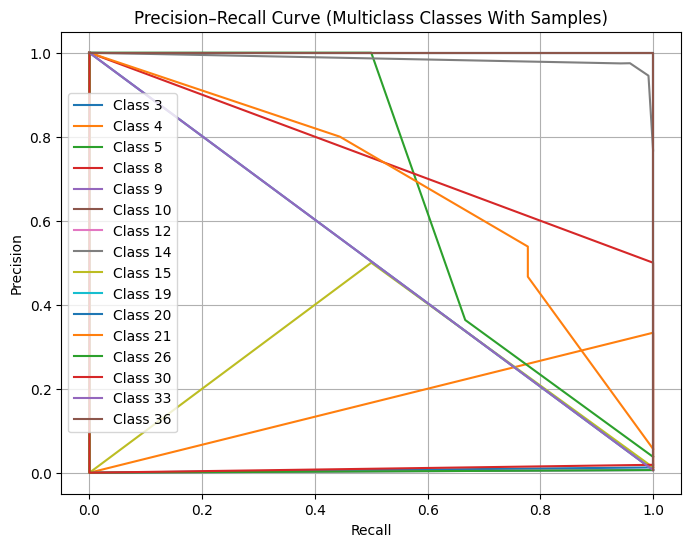

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

classes = np.unique(y_train)

y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = dt.predict_proba(X_test)

plt.figure(figsize=(8, 6))

for i, c in enumerate(classes):
    if y_test_bin[:, i].sum() == 0:
        print(f"Skipping class '{c}' (no samples in y_test)")
        continue

    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(recall, precision, label=f"Class {c}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Multiclass Classes With Samples)")
plt.legend()
plt.grid()
plt.show()


Decision Tree Pruning Path

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


Plot Alpha vs Impurity

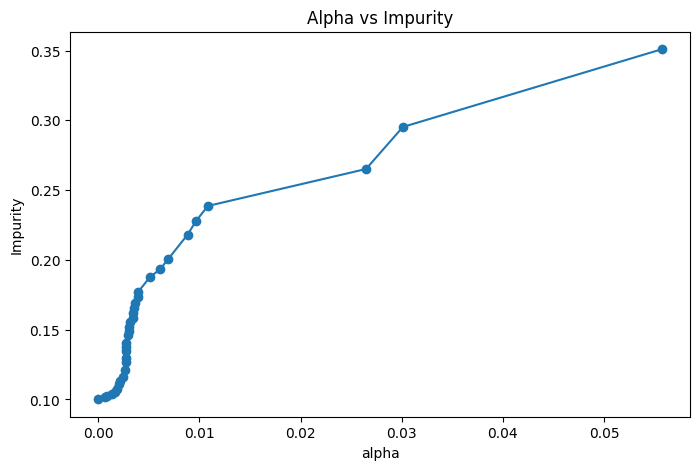

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o')
plt.xlabel("alpha")
plt.ylabel("Impurity")
plt.title("Alpha vs Impurity")
plt.show()


Train Trees for All Alphas

In [ ]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf_tmp = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_tmp.fit(X_train, y_train)
    clfs.append(clf_tmp)

print("Total trees trained:", len(clfs))


Total trees trained: 35


Plot Node Counts + Depth

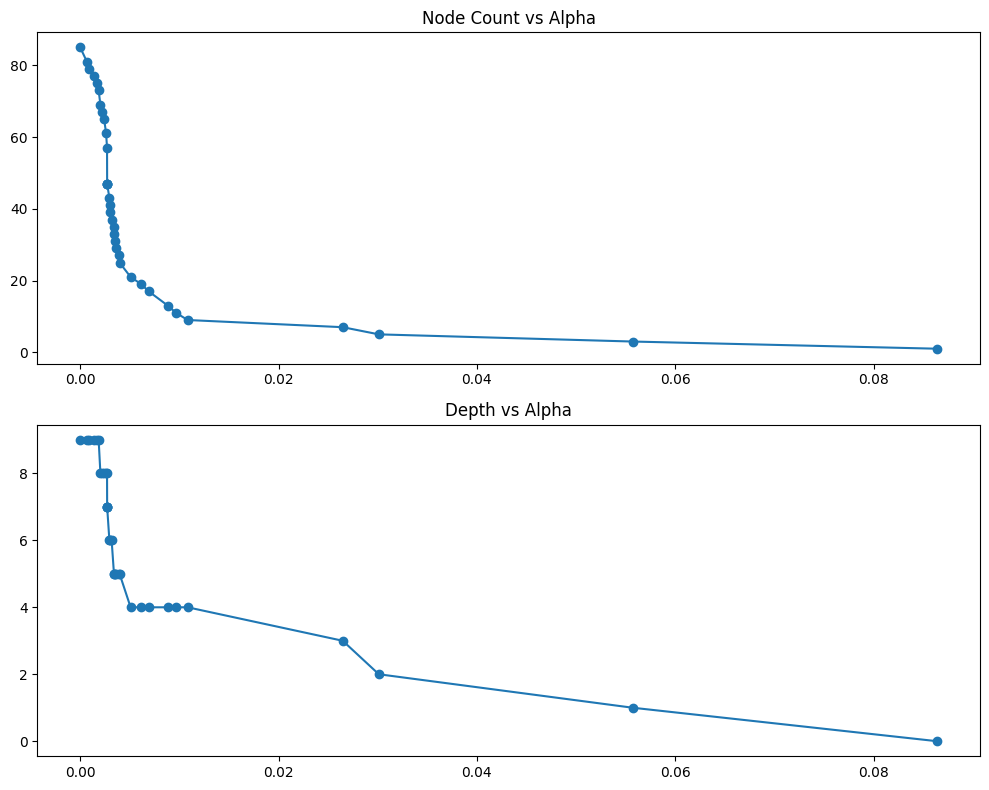

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]
depths = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2,1, figsize=(10,8))

ax[0].plot(ccp_alphas, node_counts, marker='o')
ax[0].set_title("Node Count vs Alpha")

ax[1].plot(ccp_alphas, depths, marker='o')
ax[1].set_title("Depth vs Alpha")

plt.tight_layout()
plt.show()


Accuracy vs Alpha

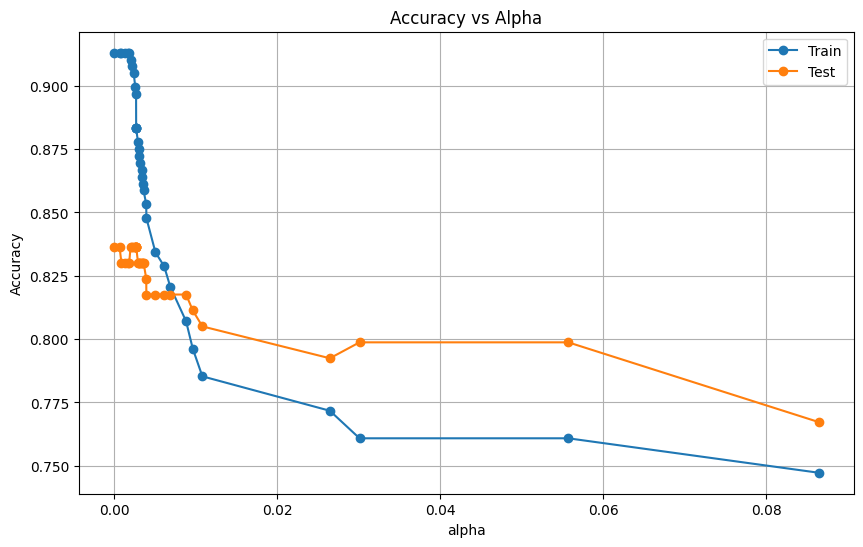

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores  = [clf.score(X_test, y_test) for clf in clfs]

plt.figure(figsize=(10,6))
plt.plot(ccp_alphas, train_scores, marker='o', label="Train")
plt.plot(ccp_alphas, test_scores, marker='o', label="Test")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.legend()
plt.grid()
plt.show()


Choose Best Alpha & Retrain

In [ ]:
best_alpha = 0.019   # change if your graph shows different best alpha

clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf_pruned.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.019, random_state=0)

Accuracy After Pruning

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, clf_pruned.predict(X_test)))
print("Train Accuracy:", accuracy_score(y_train, clf_pruned.predict(X_train)))


Test Accuracy: 0.8050314465408805
Train Accuracy: 0.7853260869565217


Visualize Pruned Tree

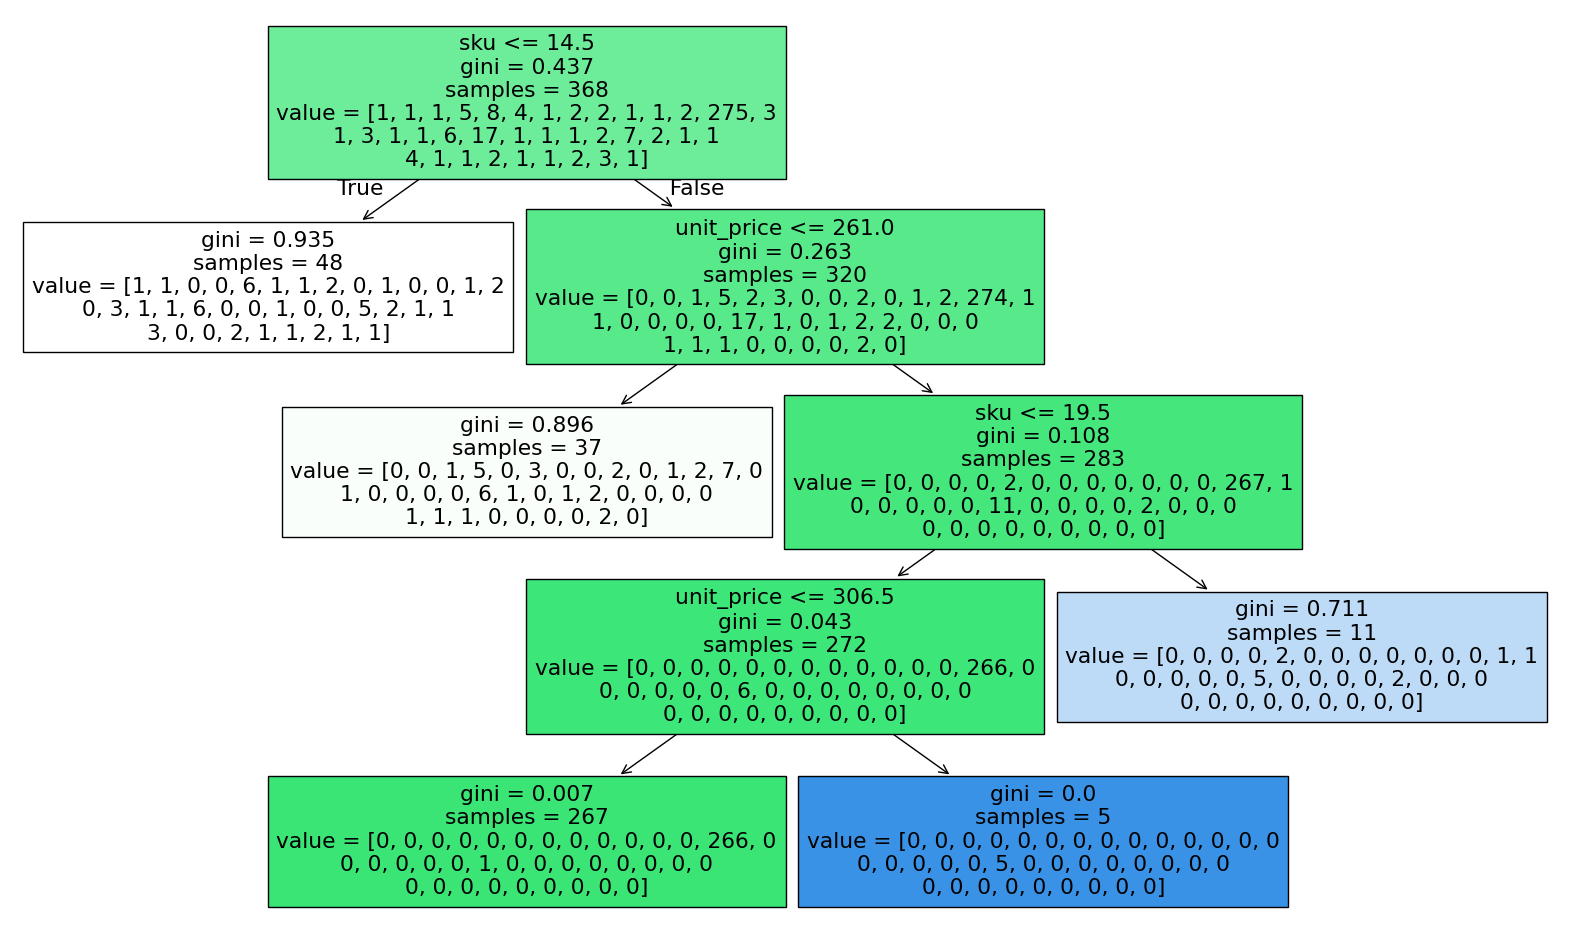

In [ ]:
from sklearn import tree

plt.figure(figsize=(20,12))
tree.plot_tree(clf_pruned, filled=True, feature_names=X.columns)
plt.show()
